<a href="https://www.kaggle.com/code/trungto/diabetespredictions?scriptVersionId=103595610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# To predict diabetes using PIMA diabetes data

Description: The objective of this diabetes dataset is to predict whether patient have diabetes or not. The datasets consists of several medical predictor (independent and one target variable).
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

#### Name of the features with their meanings

1. `Pregnancies`: Number of times pregnants
2. `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. `BloodPressure`: Diastolic blood pressure (mmHg)
4. `SkinThickness`: Triceps skin fold thickness (mm)
5. `Insulin`: 2-hour serum insulin (mu U/ml)
6. `BMI`: Body Mass Index (weight in kg/(height in m)^2)
7. `DiabetesPedigreeFunction`: Diabetes pedigree function
8. `Age`: years
9. `Outcome`: Class variable (0 or 1)

## 1. Import libraries and load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
# Load the dataset
diabetes = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

## 2. EDA

### 2.1 Understanding the variables

In [ ]:
# Print the first 5 rows of the dataset
diabetes.head()

In [ ]:
# Find the number of rows and columns in the dataset
diabetes.shape

In [ ]:
# Get the info of all features in the dataset 
diabetes.info()

In [ ]:
# Statistical summary
diabetes.describe()

#### Observation:
In the above table, the min value of columns `Glucose`, `BloodPressure`, `SkinThickness`, `Inssulin`, `BMI` are zero (0) values. It is clear that those value can not be zero. Therefore, I am going to impute the values of these respective columns instead of zero in the next step.

### 2.2 Data cleaning

#### 2.2.1 Drop the duplicates: 
To check if there is any duplicate rows are exist or not, if exist then we should remove from the dataset

In [ ]:
# Check the shape before drop the duplicates
diabetes.shape

In [ ]:
diabetes=diabetes.drop_duplicates()

In [ ]:
# Check the shape after drop the duplicates
diabetes.shape

Before drop and after the duplicates the dataset has same shape which means no duplicates in the dataset

#### 2.2.2 Check the NULL values

In [ ]:
# Check if any null value is present
diabetes.isnull().sum()

There is no NULL values in the given dataset

#### 2.2.3 Deal with the Zero values in the dataset

In [ ]:
# Find the number of zero value in the features: `Glucose`, `BloodPressure`, `SkinThickness`, `Inssulin`, `BMI`
print('No. of zero values in Glucose is',diabetes[diabetes['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure is',diabetes[diabetes['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness is',diabetes[diabetes['SkinThickness']==0].shape[0])
print('No. of zero values in Insulin is',diabetes[diabetes['Insulin']==0].shape[0])
print('No. of zero values in BMI is',diabetes[diabetes['BMI']==0].shape[0])

In [ ]:
# Replace the zero values with mean of that columns
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].mean())

In [ ]:
# Check with statiscal summary
diabetes.describe()

#### 2.2.4 Check the imbalanced dataset

In [ ]:
diabetes["Outcome"].value_counts().to_frame()

In [ ]:
diabetes["Outcome"].value_counts(normalize=True).to_frame()

0 -> Non-diabetic. 1 -> Diabetic. Only 34.8% people which have diabete. So the data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance

## 3. Data visualization

#### 3.1 Histogram

In [ ]:
# Histogram of each feature
diabetes.hist(figsize = (10,10),bins=10)
plt.show()

#### 3.2 Analyzing relationships between variables

In [ ]:
#Correlation

In [ ]:
# get correlation of each features in dataset
cormat = diabetes.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
# plot heat map
g = sns.heatmap(diabetes[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
diabetes.corr()

## 4. Split the data frame into X and y

In [ ]:
target_name = 'Outcome'

# Separate object for target feature
y = diabetes[target_name]

# Separate object for input features

X = diabetes.drop(target_name, axis=1)

In [ ]:
X.head()

In [ ]:
y.head()

## 5. Apply Feature Scaling
There are some feature scaling: StandardScaler, Normalizer, Minmax Scaler and Binarizer. In this project, I use StandardScaler for scaling the feature.

In [ ]:
# Apply Stadard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

## 6. Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

## 7. Build the Algorithm

### 7.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

### 7.2 KNeighborsClassifier (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

### 7.3 Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)

### 7.4 Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

### 7.5 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

### 7.6 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

## 8. Making prediction

### 8.1 Making prediction on test by using logistic Regression

In [ ]:
## Making prediction on test dataset
lr_pred=lr.predict(X_test)

### 8.2 Making prediction on test by using KNN

In [ ]:
## Making prediction on test dataset
knn_pred=knn.predict(X_test)

### 8.3 Making prediction on test by using Naive-Bayes Classifier

In [ ]:
## Making prediction on test dataset
nb_pred=nb.predict(X_test)

### 8.4 Making prediction on test using SVM

In [ ]:
## Making prediction on test dataset
sv_pred=sv.predict(X_test)

### 8.5 Making prediction on test using Decision Tree

In [ ]:
## Making prediction on test dataset
dt_pred=dt.predict(X_test)

### 8.6 Making prediction on test using Random Forest

In [ ]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

## 9. Model evaluation

### 9.1 Train score and Test score

In [ ]:
# Train score and Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lr.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lr_pred))

In [ ]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

In [ ]:
# Train score and Test score of Naive-Bayes
print("Train accuracy of Naive-Bayes is", nb.score(X_train, y_train))
print("Accuracy (Test) score of Naive-Bayes is", nb.score(X_test, y_test))
print("Accuracy (Test) score of Naive-Bayes is", accuracy_score(y_test, nb_pred))

In [ ]:
# Train score and Test score of SVM
print("Train accuracy of SVM is", sv.score(X_train, y_train))
print("Accuracy (Test) score of SVM is", sv.score(X_test, y_test))
print("Accuracy (Test) score of SVM is", accuracy_score(y_test, sv_pred))

In [ ]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

In [ ]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

### 9.2 Confusion Matrix

Confusion metrics is a table which is used to describe the performance of a classification problem.

It visualizes the accuracy of a classifier by comparing predicted values with actual values

The terms used in confusion metrics are true positive (TP), true negative (TN), false positive (FP) and false negative (FN)

1. True Positive: The predicted result is positive, while it is labeled as positive
2. False Postitive: The predicted result is positive, while it is labeled as negative
3. False Negative: The predicted result is negative, while it is labeled as positive
4. True Negative: The predicted result is negative, while it is labled as negative

#### 9.2.1 Confusion Matrix of "Logistic Regression"

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# confusion matrix of Logistic Regression
cm=confusion_matrix(y_test,lr_pred)
cm

In [ ]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True)

In [ ]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [ ]:
TN, TP, FN , TP

In [ ]:
pd.crosstab(y_test, lr_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

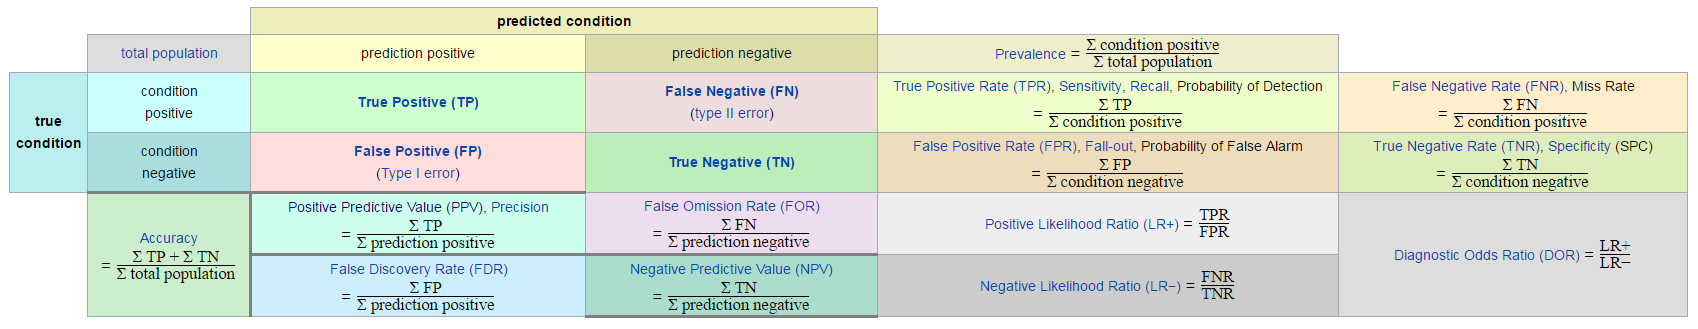

##### Classification Report of Logistic Regression

In [ ]:
print('Clasification Report of Logistic Regression: \n', classification_report(y_test,lr_pred,digits=4))

##### ROC Curve & ROC AUC

ROC curve is one of the important evaluating metrics that should be used to check the performance of an classification model. It is als called relative operating characteristic curve, because it is a comparison of two main characteristics (TPR and FPR). It is plotted between sensitivity (a.k.a recall a.k.a True Positive Rate) and False Positive Rate (FPR = 1 - Specitivity)  

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g if a patient has a disease or not) 

Area under Curve (AUC) helps us to choose the best model amongst the models for which we have plotted the ROC curves

In [ ]:
# Area Under Curve
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, lr_pred)
print("ROC AUC SCORE of Logistic Regression is",auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend()
plt.grid()
plt.show()

#### 9.2.2 Confusion Matrix of "KNN"

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)

In [ ]:
pd.crosstab(y_test, knn_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

In [ ]:
print('Clasification Report of KNN: \n', classification_report(y_test,knn_pred,digits=4))

In [ ]:
print(rf_pred)

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, knn_pred)
print("ROC AUC SCORE of KNN is",auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend()
plt.grid()
plt.show()

#### 9.2.3 Confusion Matrix of "Naive-Bayes Classifier"

In [ ]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True)

In [ ]:
pd.crosstab(y_test, nb_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

In [ ]:
print('Clasification Report of Naive-Bayes: \n', classification_report(y_test,nb_pred,digits=4))

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, nb_pred)
print("ROC AUC SCORE of Naive-Bayes is",auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive-Bayes')
plt.legend()
plt.grid()
plt.show()

#### 9.2.4 Confusion Matrix of "SVM"

In [ ]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True)

In [ ]:
pd.crosstab(y_test, sv_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

In [ ]:
print('Clasification Report of SVM: \n', classification_report(y_test,sv_pred,digits=4))

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, sv_pred)
print("ROC AUC SCORE of SVM is",auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend()
plt.grid()
plt.show()

#### 9.2.5 Confusion Matrix of "Decision Tree"

In [ ]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)

In [ ]:
pd.crosstab(y_test, dt_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

In [ ]:
print('Clasification Report of Decision Tree: \n', classification_report(y_test,dt_pred,digits=4))

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, dt_pred)
print("ROC AUC SCORE of Decision Tree is",auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree')
plt.legend()
plt.grid()
plt.show()

#### 9.2.6 Confusion Matrix of "Random Forest"

In [ ]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)

In [ ]:
pd.crosstab(y_test, rf_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

In [ ]:
print('Clasification Report of Decision Tree: \n', classification_report(y_test,rf_pred,digits=4))

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, rf_pred)
print("ROC AUC SCORE of Random Forest is",auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend()
plt.grid()
plt.show()

## 10. Conclusion

According to the highest accuracy of test score as well as the ROC AUC Score result, we should consider 2 models below to apply for this project:

1. Support Vector Machine: - Accuracy of test score: 0.8312; - ROC AUC Score: 0.7936
2. Decision Tree: - Accuracy of test score: 0.8182 ; - ROC AUC Score: 0.8123